<a href="https://colab.research.google.com/github/Gokul-Ram-96/Deep_Learning/blob/master/Pan_card_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13368 (delta 1), reused 2 (delta 0), pack-reused 13357
Receiving objects: 100% (13368/13368), 12.00 MiB | 17.62 MiB/s, done.
Resolving deltas: 100% (9122/9122), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'AUG 15'
 backup
'Bhavikatti FEM.pdf'
'Chandrapatla FEM.pdf'
'Check this out from The Times of India'
'Class photo day (college)'
'Colab Notebooks'
 com.madajevi.android.phonebook.transfer
'C_V_Gokul Ram_(09_12_18).pdf'
 darknet
 detection_1_Plane.jpg
 Dravid_India_series.mp4
'Farewell pics'
 formation_20.jpg
 Gokul_SnowKingdom.jpg
'hal musm 2'
'Hindi script '
 images
 img20190211_21453152.jpg
 JPEG_TXT.zip
'My Saved Places.gmap'
 Page-1.tif
 Page-2.tif
 Page-3.tif
 Page-4.tif
 Pan_test.jpg
'passport size photo_1.pdf'
'performance appraisal document fy 2012  9th june.gsheet'
 postponed.pdf
'PROJECT_REPORT FINAL DRAFT_1.pdf'
'PROJECT_REPORT FINAL_PRINT.pdf'
 Recordings
 Scan_10.png
 Scan_11.png
 Scan_12.png
 Scan_13.png
 Scan_14.png
 Scan_15.png
 Scan_16.png
 Scan_17.png
 Scan_18.png
 Scan_19.png
 Scan_1.png
 Scan_20.png
 Scan_21.png
 Scan_22.png
 Scan_23.png
 Scan_24.png
 Scan_25.png
 Scan_2.png
 Scan_3.png
 Scan_4.png
 Scan_5.png
 Scan_6.png
 Scan_7.png
 Scan_8.png
 Scan_9.png
 Scan_N

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3_group_01

backup		  generate_train.py  obj.names	test.zip
generate_test.py  obj.data	     obj.zip	yolov3_custom.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
%cd darknet
#%pwd
!cp /mydrive/yolov3_group_01/obj.zip ../

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d /content/darknet/data/

Archive:  ../obj.zip
  inflating: /content/darknet/data/obj/0008c7ed0ef8ad164af5.jpg  
  inflating: /content/darknet/data/obj/0008c7ed0ef8ad164af5.txt  
  inflating: /content/darknet/data/obj/006a73368769d04aabcf.jpg  
  inflating: /content/darknet/data/obj/006a73368769d04aabcf.txt  
  inflating: /content/darknet/data/obj/009ac27ebff73364b431.jpg  
  inflating: /content/darknet/data/obj/009ac27ebff73364b431.txt  
  inflating: /content/darknet/data/obj/00a6e1cf1430a8811de6.jpg  
  inflating: /content/darknet/data/obj/00a6e1cf1430a8811de6.txt  
  inflating: /content/darknet/data/obj/00ad72b8f11ac49adf69.jpg  
  inflating: /content/darknet/data/obj/00ad72b8f11ac49adf69.txt  
  inflating: /content/darknet/data/obj/00e6cd36d6e610109d87.jpg  
  inflating: /content/darknet/data/obj/00e6cd36d6e610109d87.txt  
  inflating: /content/darknet/data/obj/00f5b969a7c6cbb0f20c.jpg  
  inflating: /content/darknet/data/obj/00f5b969a7c6cbb0f20c.txt  
  inflating: /content/darknet/data/obj/01170cb3bedf7898

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3_group_01/yolov3_custom.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3_group_01//obj.names ./data
!cp /mydrive/yolov3_group_01//obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3_group_01/generate_train.py ./

In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-05-08 10:22:01--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-05-08 10:22:01--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   139KB/s    in 24m 37s 

2020-05-08 10:46:39 (107 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

/bin/bash: ./darknet: No such file or directory


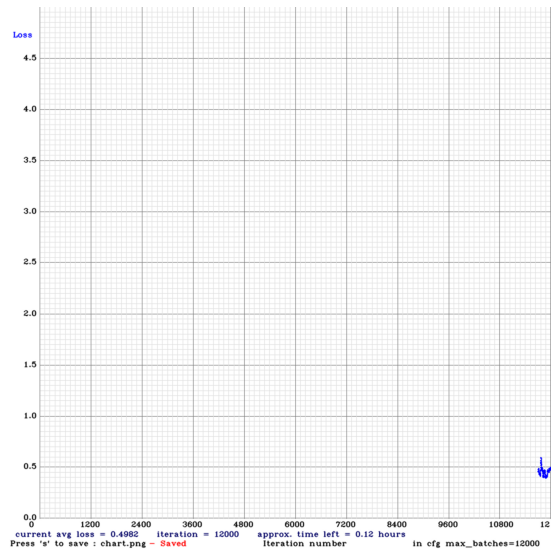

In [ ]:
imShow('chart.png')

In [ ]:
#use this only to resume training from last learned weights
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3_group_01/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.833899, GIOU: 0.826261), Class: 0.999955, Obj: 0.886790, No Obj: 0.000099, .5R: 1.000000, .75R: 1.000000, count: 2, class_loss = 0.343546, iou_loss = 0.048258, total_loss = 0.391805 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.848294, GIOU: 0.847300), Class: 0.999924, Obj: 0.998199, No Obj: 0.001928, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.000418, iou_loss = 0.067799, total_loss = 0.068217 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.844788, GIOU: 0.842361), Class: 0.999578, Obj: 0.865344, No Obj: 0.002132, .5R: 1.000000, .75R: 0.941176, count: 17, class_loss = 0.283284, iou_loss = 0.477909, total_loss = 0.761192 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: -0.102297), Class: 0.663020, Obj: 0.005067, No Obj: 0.000006, .5R: 0.000000, .75R: 0.000000, count:

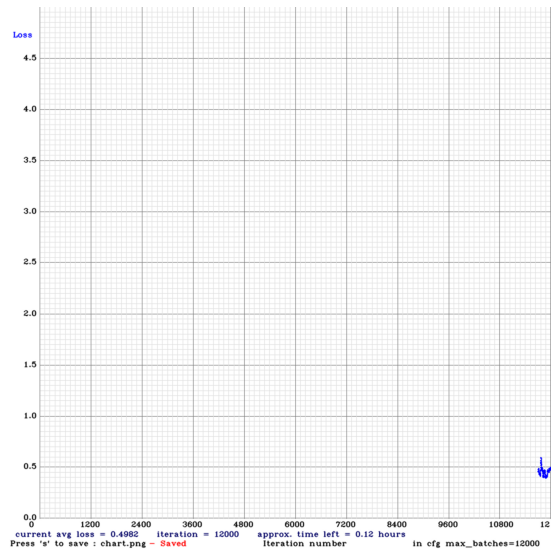

In [ ]:
imShow('chart.png')

In [ ]:
#use this only to resume training from last learned weights
!./darknet detector map data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3_group_01/backup/yolov3_custom_12000.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

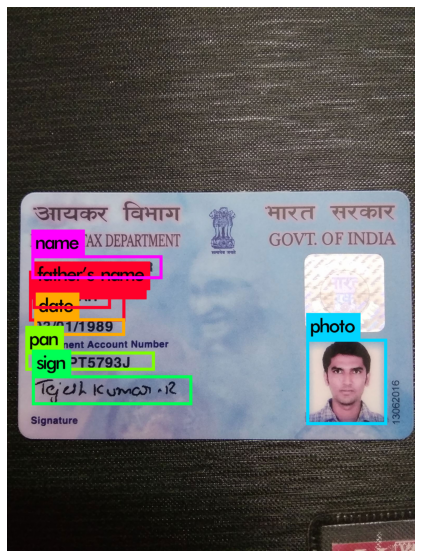

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3_group_01/backup/yolov3_custom_last.weights /mydrive/images/safari.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup		  generate_train.py  obj.names	test.zip
generate_test.py  obj.data	     obj.zip	yolov3_custom.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
%cd darknet
#%pwd
!cp /mydrive/yolov3/test.zip ../

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/test
!unzip ../test.zip -d /content/darknet/data/

Archive:  ../test.zip
  inflating: /content/darknet/data/test/1.jpg  
  inflating: /content/darknet/data/test/1.txt  
  inflating: /content/darknet/data/test/10.jpg  
  inflating: /content/darknet/data/test/10.txt  
  inflating: /content/darknet/data/test/100.jpg  
  inflating: /content/darknet/data/test/100.txt  
  inflating: /content/darknet/data/test/101.jpg  
  inflating: /content/darknet/data/test/101.txt  
  inflating: /content/darknet/data/test/102.jpg  
  inflating: /content/darknet/data/test/102.txt  
  inflating: /content/darknet/data/test/103.jpg  
  inflating: /content/darknet/data/test/103.txt  
  inflating: /content/darknet/data/test/104.jpg  
  inflating: /content/darknet/data/test/104.txt  
  inflating: /content/darknet/data/test/105.jpg  
  inflating: /content/darknet/data/test/105.txt  
  inflating: /content/darknet/data/test/106.jpg  
  inflating: /content/darknet/data/test/106.txt  
  inflating: /content/darknet/data/test/107.jpg  
  inflating: /content/darknet/data

In [ ]:
# upload the generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_test.py ./

In [ ]:
!python generate_test.py

In [ ]:
# verify test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt
